<a href="https://colab.research.google.com/github/Lakxz/Thamizhan_skill/blob/main/INTERN_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("sales_data.csv")
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
print(df.columns)

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')


In [ ]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

In [ ]:
df = df.sort_values('Sale_Date')

In [ ]:
df['day_number'] = (df['Sale_Date'] - df['Sale_Date'].min()).dt.days

In [ ]:
X = df[['day_number']]
y = df['Sales_Amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 8461519.492498728
R² Score: -0.03924430105153398


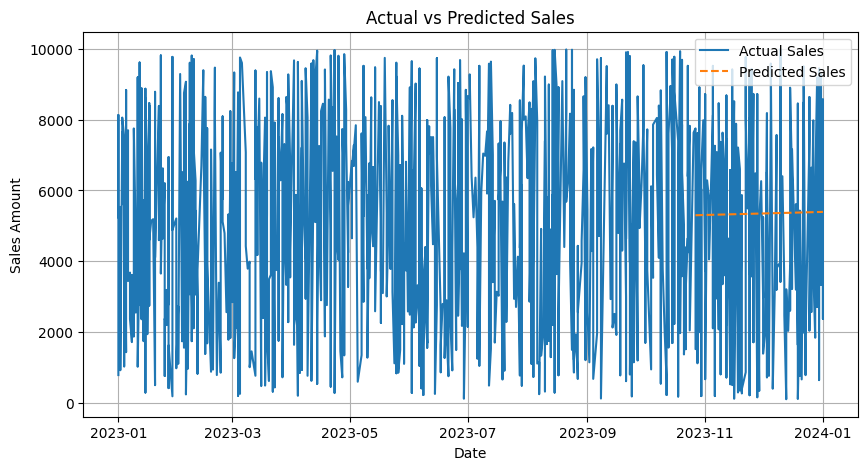

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['Sale_Date'], df['Sales_Amount'], label="Actual Sales")
plt.plot(
    df.iloc[len(X_train):]['Sale_Date'],
    y_pred,
    label="Predicted Sales",
    linestyle='dashed'
)
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
future_days = 30
last_day = df['day_number'].max()

future_day_numbers = np.arange(
    last_day + 1,
    last_day + future_days + 1
).reshape(-1, 1)
future_X = pd.DataFrame(future_day_numbers, columns=['day_number'])
future_sales = model.predict(future_X)

In [ ]:
future_dates = pd.date_range(
    start=df['Sale_Date'].max() + pd.Timedelta(days=1),
    periods=future_days
)
forecast_df = pd.DataFrame({
    'Sale_Date': future_dates,
    'Predicted_Sales_Amount': future_sales
})

forecast_df.head()

,Sale_Date,Predicted_Sales_Amount
0,2024-01-02,5394.091217
1,2024-01-03,5395.519069
2,2024-01-04,5396.946922
3,2024-01-05,5398.374774
4,2024-01-06,5399.802627


In [ ]:
forecast_df.to_csv("sales_forecast.csv", index=False)